# Práctica 2

## Lucas Hidalgo Herrera

Se importarán todos los paquetes generales en la siguiente celdad de código, si hay alguno necesario para un ejercicio que no se encuentre ahí, se añadirá al ejercicio.

In [1417]:
import numpy as np
import sympy as sp
import importlib as ilib
import matplotlib.pyplot as plt
import derivacion_numerica as dn
import integracion_numerica as intn
from scipy.integrate import quad

ilib.reload(dn)
ilib.reload(intn)

<module 'integracion_numerica' from '/home/el_dramas/Desktop/Infomates/Tercer_Curso/Segundo_Cuatri/Metodos_Numericos_II/Practicas/P2/integracion_numerica.py'>

### Ejercicio 1
> Pruebe ahora a repetir el mismo proceso, pero con los datos de interpolación  
> 
> a) $(a-h,f(a-h))$ y $(a,f(a))$,
> 
> b) $(a-h,f(a-h))$ y $(a+h,f(a+h))$. 
> 
> ¿Qué fórmulas de derivación numérica se obtiene en cada caso?

Procederemos de la siguiente forma, definimos los símbolos y funciones simbólicas que sean necesarias así como los valores de x que necesitemos para realizar la obtención de la fórmula.

A continuación, procederemos a obtener el polinomio de interpolación y a derivar la expresión del mismo.

In [1418]:
f = sp.Function('f')                # Crea función simbólica
a,h = sp.symbols('a,h')
x_values = [a-h,a]                  # Intervalo simbólico, lista que contiene variables simbólicas
x_values

[a - h, a]

In [1419]:
y_values = [f(x_values[0]),f(x_values[1])]
y_values

[f(a - h), f(a)]

In [1420]:
x = sp.Symbol('x')  # utilizaremos x como variable simbólica
p = (y_values[1]-y_values[0])/(x_values[1]-x_values[0])*(x-x_values[0])+y_values[0]
p  # este sería el polinomio interpolador de grado $1$, ecuación recta tangente con derivada aproximada (f(b)-f(a))/(b-a)

f(a - h) + (f(a) - f(a - h))*(-a + h + x)/h

In [1421]:
p.subs({x:x_values[0]}),p.subs({x:x_values[1]}) #  Comprobamos que el polinomio interpolador pasa por los puntos (a,f(a)) y (a+h,f(a+h))

(f(a - h), f(a))

In [1422]:
sp.diff(p,x)  # Derivamos el polinomio interpolador

(f(a) - f(a - h))/h

Por tanto, nuestra fómula de interpolación es:
$$\frac{f(a)-f(a-h)}{h}$$
Es decir, la **diferencia regresiva**.

Procedemos de la misma forma con el segundo apartado.

In [1423]:
x_values = [a-h,a+h]                  # Intervalo simbólico, lista que contiene variables simbólicas
x_values

[a - h, a + h]

In [1424]:
y_values = [f(x_values[0]),f(x_values[1])]
y_values

[f(a - h), f(a + h)]

In [1425]:
x = sp.Symbol('x')  # utilizaremos x como variable simbólica
p = (y_values[1]-y_values[0])/(x_values[1]-x_values[0])*(x-x_values[0])+y_values[0]
p  # este sería el polinomio interpolador de grado $1$, ecuación recta tangente con derivada aproximada (f(b)-f(a))/(b-a)

f(a - h) + (-f(a - h) + f(a + h))*(-a + h + x)/(2*h)

In [1426]:
sp.diff(p,x)  # Derivamos el polinomio interpolador

(-f(a - h) + f(a + h))/(2*h)

Por tanto, nuestra fómula de interpolación es:
$$\frac{f(a+h)-f(a-h)}{2h}$$
Es decir, la **diferencia centrada con dos nodos**.

### Ejercicio 2
>Codifica una función para calcular la fórmula de derivación de tipo interpolatorio obtenida al derivar el polinomio interpolador en una lista de nodos que acepte como argumento. Añade un argumento opcional que sea el orden de la derivada a calcular. Comprueba el correcto funcionamiento de esta función con los ejemplos mostrados hasta el momento.

Vamos a probar la función del módulo *derivacion_numerica* con los ejemplos vistos:
- Diferencia progresiva: $x\_values=(a,a+h)$
- Diferencia regresiva: $x\_values=(a-h,a)$
- Diferencia centrada con dos nodos: $x\_values=(a-h,a+h)$
- Diferencia centrada con tres nodos: $x\_values=(a-h,a,a+h)$

In [1427]:
f = sp.Function('f')                
a,h = sp.symbols('a,h')
array_exp =[]

# Fórmula diferencia progresiva
x_values = [a,a+h]                  
array_exp.append(dn.formulador(f,x_values,a,1))

# Fórmula diferencia regresiva
x_values = [a-h,a]                  
array_exp.append(dn.formulador(f,x_values,a,1))

# Fórmula diferencia centrada con dos nodos
x_values = [a-h,a+h]                  
array_exp.append(dn.formulador(f,x_values,a,1))

# Fórmula centrada con tres nodos
x_values = [a-h,a,a+h]                  
array_exp.append(dn.formulador(f,x_values,a,1))

print('Diferencia progresiva: ' ,array_exp[0])
print('Diferencia regresiva: ' ,array_exp[1])
print('Diferencia centrada con dos nodos: ' ,array_exp[2])
print('Diferencia centrada con tres nodos: ' ,array_exp[3])

Diferencia progresiva:  (-f(a) + f(a + h))/h
Diferencia regresiva:  (f(a) - f(a - h))/h
Diferencia centrada con dos nodos:  (-f(a - h) + f(a + h))/(2*h)
Diferencia centrada con tres nodos:  (-f(a - h) + f(a + h))/(2*h)


Por tanto, los resultados obtenidos son los buscados, además podemos apreciar que la fórmula de diferencia centrada con dos nodos es igual a la diferencia centrada con tres nodos.

### Ejercicio 3
> Repita este procedimiento con la fórmula para la segunda derivada
> $$
> f''(a) \approx \frac{f(a+h)-2f(a)+f(a-h)}{h^2}
> $$
> y compruebe que tiene orden de aproximación 2.

In [1428]:
formula_der = lambda f: (f(a+h)-2*f(a)+f(a-h))/(h**2) # fórmula derivada
formula_der(sp.Function('g'))

(-2*g(a) + g(a - h) + g(a + h))/h**2

In [1429]:
exact_values =[sp.diff(x**i,x,2).subs({x:a}) for i in range(10)]    # Derivada segunda de x^i con i=0,...,9
exact_values

[0, 0, 2, 6*a, 12*a**2, 20*a**3, 30*a**4, 42*a**5, 56*a**6, 72*a**7]

In [1430]:
approx_values =[formula_der(lambda x:x**i).simplify() for i in range(10)]
approx_values

[0,
 0,
 2,
 6*a,
 12*a**2 + 2*h**2,
 10*a*(2*a**2 + h**2),
 (-2*a**6 + (a - h)**6 + (a + h)**6)/h**2,
 (-2*a**7 + (a - h)**7 + (a + h)**7)/h**2,
 (-2*a**8 + (a - h)**8 + (a + h)**8)/h**2,
 (-2*a**9 + (a - h)**9 + (a + h)**9)/h**2]

In [1431]:
np.array(approx_values) - np.array(exact_values)

#? Qué diferencia hay entra lo de la practica y esto?

array([0, 0, 0, 0, 2*h**2, -20*a**3 + 10*a*(2*a**2 + h**2),
       -30*a**4 + (-2*a**6 + (a - h)**6 + (a + h)**6)/h**2,
       -42*a**5 + (-2*a**7 + (a - h)**7 + (a + h)**7)/h**2,
       -56*a**6 + (-2*a**8 + (a - h)**8 + (a + h)**8)/h**2,
       -72*a**7 + (-2*a**9 + (a - h)**9 + (a + h)**9)/h**2], dtype=object)

In [1432]:
for i in range(10):
    print(f"Diferencia entre el valor aproximado y el valor exacto de (x^{i})\'\': {approx_values[i]- exact_values[i]}")
print("comprobación terminada; deduzca de aquí el grado de exactitud de la fórmula")

Diferencia entre el valor aproximado y el valor exacto de (x^0)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^1)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^2)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^3)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^4)'': 2*h**2
Diferencia entre el valor aproximado y el valor exacto de (x^5)'': -20*a**3 + 10*a*(2*a**2 + h**2)
Diferencia entre el valor aproximado y el valor exacto de (x^6)'': -30*a**4 + (-2*a**6 + (a - h)**6 + (a + h)**6)/h**2
Diferencia entre el valor aproximado y el valor exacto de (x^7)'': -42*a**5 + (-2*a**7 + (a - h)**7 + (a + h)**7)/h**2
Diferencia entre el valor aproximado y el valor exacto de (x^8)'': -56*a**6 + (-2*a**8 + (a - h)**8 + (a + h)**8)/h**2
Diferencia entre el valor aproximado y el valor exacto de (x^9)'': -72*a**7 + (-2*a**9 + (a - h)**9 + (a + h)**9)/h**2
comprobación terminada; deduzca de aquí el grado de exactitud de la fórmula

Por tanto, el orden de exactitud para funciones polinómicas es 3.

In [1433]:
n=7
fseries = (f(x).series(x,a,n)).removeO()    # Series de Taylor de f(z) en el punto z=a hasta orden n-1 sin incluir O(z^5)
fseries

(-a + x)**6*Subs(Derivative(f(_xi_1), (_xi_1, 6)), _xi_1, a)/720 + (-a + x)**5*Subs(Derivative(f(_xi_1), (_xi_1, 5)), _xi_1, a)/120 + (-a + x)**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/24 + (-a + x)**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/6 + (-a + x)**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)/2 + (-a + x)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + f(a)

In [1434]:
fmas    = fseries.subs({x:(a+h)})           # Polin. Taylor para x=a+h
fmenos  = fseries.subs({x:(a-h)})           # Polin. Taylor para x=a-h
fa = fseries.subs({x:a})                    # Polin. Taylor para x=a

In [1435]:
sp.expand((fmas + fmenos - 2*fa)/(h**2))

h**4*Subs(Derivative(f(_xi_1), (_xi_1, 6)), _xi_1, a)/360 + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/12 + Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)

Vemos que el error de aproximación es de orden $h²$, como se buscaba.


### Ejercicio 4:
> Utilice la función $f(x) = \dfrac{e^{\cos(x)}}{x^2+1}$ y el valor $a=1$ y compruebe que ocurre este mismo hecho. Repita el procedimiento utilizando la fórmula de diferencia centrada en lugar de la de diferencia progresiva y comenta las diferencias observadas.

In [1436]:
x = sp.Symbol('x')
fsymb = sp.exp(sp.cos(x))/(x**2+1)

fnum = lambda x: np.exp(np.cos(x))/(x**2+1)

In [1437]:
a = 1 # El valor exacto de la derivada de la función en este punto
vexacto = (sp.diff(fsymb,x)).subs({x:a}) # sería el siguiente
vexacto.evalf()

-1.58046613519819

In [1438]:
n = 20 
dersnum = np.array([(fnum(a+10**(-j))-fnum(a))/(10**(-j)) for j in range(n+1)])
[sp.N(dersnum[k],6) for k in range(n+1)]

[-0.726346,
 -1.46063,
 -1.56825,
 -1.57924,
 -1.58034,
 -1.58045,
 -1.58046,
 -1.58047,
 -1.58047,
 -1.58047,
 -1.58047,
 -1.58046,
 -1.58062,
 -1.57874,
 -1.57652,
 -1.88738,
 0,
 0,
 0,
 0,
 0]

In [1439]:
errores = np.array(dersnum) - vexacto.evalf()  # Aquí podemos ver una tabla
print(errores)  

[0.854119967908255 0.119838449606543 0.0122125025833004
 0.00122312718892359 0.000122331026478184 1.22332700112082e-5
 1.22347693376490e-6 1.19360135775182e-7 3.27627398544195e-8
 -1.78179634824360e-7 -7.33291147136939e-7 8.14849304986431e-6
 -0.000158384960643909 0.00172899418121886 0.00394944023046917
 -0.306913006664574 1.58046613519819 1.58046613519819 1.58046613519819
 1.58046613519819 1.58046613519819]


Repetimos con la diferencia centrada con dos nodos:

In [1440]:
dersnum = np.array([(fnum(a+10**(-j))-fnum(a-10**(-j)))/(2*10**(-j)) for j in range(n+1)])
[sp.N(dersnum[k],6) for k in range(n+1)] 

[-1.29318,
 -1.58243,
 -1.58049,
 -1.58047,
 -1.58047,
 -1.58047,
 -1.58047,
 -1.58047,
 -1.58047,
 -1.58047,
 -1.58047,
 -1.58046,
 -1.58051,
 -1.57985,
 -1.57652,
 -1.72085,
 -0.555112,
 0,
 0,
 0,
 0]

In [1441]:
errores = np.array(dersnum) - vexacto.evalf()  # Aquí podemos ver una tabla
print(errores)

[0.287283562210927 -0.00196789925936902 -2.02794408181717e-5
 -2.02854397057806e-7 -2.02887417977138e-9 -2.21458407168029e-11
 1.11606279773468e-11 -1.09906239664781e-9 1.05582793619163e-8
 -1.16461811305868e-8 -1.78179634824360e-7 8.14849304986431e-6
 -4.73626581813935e-5 0.000618771156593700 0.00394944023046917
 -0.140379552970801 1.02535462288561 1.58046613519819 1.58046613519819
 1.58046613519819 1.58046613519819]


La principal diferencia es que la fórmula de la derivada centrada tiene una mayor velocidad de convergencia, pues con un $h$ mayor es capaz de realizar una mejor aproximación, por ejemplo, con $j=2$ obtiene un error mucho menor que la diferencia progresiva. A continuación, a medida que se aumenta el valor de $h$ ambas soluciones comienzan a alejarse de la solución.

### Ejercicio 5 (Implementación numérica de las fórmulas de derivación)
> Implementa una función que acepte como argumentos una función en versión numérica `f`, un valor `a`, un valor `h`, y un tercer argumento que sea la fórmula de derivación numérica utilizada. La función deberá calcular la derivada de la función `f` en el punto `a` utilizando la fórmula y el valor de `h` indicados. Las posibles fórmulas utilizadas deben incluir, al menos: diferencia regresiva, diferencia progresiva, diferencia centrada y diferencia centrada con 5 nodos. Para la función $$f(x) = \sin(\log(x^2+1)),$$ calcula el valor de $f'(-1)$, primero derivando una versión simbólica y obteniendo el valor exacto y después utilizando la función implementada con distintos valores de `h` y distintas fórmulas y comprueba las diferencias en la aproximación en cada caso.

In [1443]:
def f(x):
    return np.sin(np.log(x*x+1))

x=sp.Symbol('x')
g = lambda x: sp.sin(sp.log(x*x+1))

exacto=sp.diff(g(x),x).subs({x:-1}).evalf() # Derivada exacta en x=1
print(exacto)

-0.769238901363972


Obtenemos ahora la versión numérica aplicando cada una de las fórmulas:


In [1444]:
n = 5 # Calculemos aproximaciones, mediante una fórmula numérica de la derivada primera progresiva
dersnum = np.array([dn.derivada_numerica(f,-1,j-1,10**(-j)) for j in range(1,n+1)])
difs=[exacto-dn.derivada_numerica(f,-1,j,10**(-j)) for j in range(n)]

print('Derivada centrada con h=0.1:' , dersnum[0]) 
print('Derivada progresiva con h=0.01:' , dersnum[1])
print('Derivada regresiva con h=0.001:' , dersnum[2])
print('Derivada centrada con tres nodos con h=0.0001:' , dersnum[3])
print('Derivada centrada con cinco nodos con h=0.00001:' , dersnum[4])

print('Diferencia entre la derivada centrada y la derivada exacta con h=0.1:' , difs[0])
print('Diferencia entre la derivada progresiva y la derivada exacta con h=0.01:' , difs[1])
print('Diferencia entre la derivada regresiva y la derivada exacta con h=0.001:' , difs[2])
print('Diferencia entre la derivada centrada con tres nodos y la derivada exacta con h=0.0001:' , difs[3])
print('Diferencia entre la derivada centrada con cinco nodos y la derivada exacta con h=0.00001:' , difs[4])

Derivada centrada con h=0.1: -0.7666700331873649
Derivada progresiva con h=0.01: -0.7724078367032594
Derivada regresiva con h=0.001: -0.7689191645420257
Derivada centrada con tres nodos con h=0.0001: -0.7692388988000953
Derivada centrada con cinco nodos con h=0.00001: -0.7692389013648955
Diferencia entre la derivada centrada y la derivada exacta con h=0.1: -0.269612147952232
Diferencia entre la derivada progresiva y la derivada exacta con h=0.01: 0.0291503616058432
Diferencia entre la derivada regresiva y la derivada exacta con h=0.001: -0.00322021888898283
Diferencia entre la derivada centrada con tres nodos y la derivada exacta con h=0.0001: -2.56413040689019e-7
Diferencia entre la derivada centrada con cinco nodos y la derivada exacta con h=0.00001: 7.38298311375729e-13


Para poder tomar conclusiones correctas vamos a elegir un valor de $h$ fijo para comparar errores con los valores exactos. Concretamente vamos a tomar $h=0.001$.

In [1445]:
n = 5 # Calculemos aproximaciones, mediante una fórmula numérica de la derivada primera progresiva
dersnum = np.array([dn.derivada_numerica(f,-1,j-1,10**(-3)) for j in range(1,n+1)])
difs=[exacto-dn.derivada_numerica(f,-1,j,10**(-3)) for j in range(n)]

print('Derivada centrada:' , dersnum[0]) 
print('Derivada progresiva:' , dersnum[1])
print('Derivada regresiva:' , dersnum[2])
print('Derivada centrada con tres nodos:' , dersnum[3])
print('Derivada centrada con cinco nodos:' , dersnum[4])

print('Diferencia entre la derivada centrada y la derivada exacta:' , difs[0])
print('Diferencia entre la derivada progresiva y la derivada exacta:' , difs[1])
print('Diferencia entre la derivada regresiva y la derivada exacta:' , difs[2])
print('Diferencia entre la derivada centrada con tres nodos y la derivada exacta:' , difs[3])
print('Diferencia entre la derivada centrada con cinco nodos y la derivada exacta:' , difs[4])

Derivada centrada: -0.7692386449509314
Derivada progresiva: -0.7695581253598371
Derivada regresiva: -0.7689191645420257
Derivada centrada con tres nodos: -0.7692386449509314
Derivada centrada con cinco nodos: -0.7692389013641739
Diferencia entre la derivada centrada y la derivada exacta: -2.56413040689019e-7
Diferencia entre la derivada progresiva y la derivada exacta: 0.000319223995865037
Diferencia entre la derivada regresiva y la derivada exacta: -0.000319736821946415
Diferencia entre la derivada centrada con tres nodos y la derivada exacta: -2.56413040689019e-7
Diferencia entre la derivada centrada con cinco nodos y la derivada exacta: 2.01838545876853e-13


Los resultados obtenidos con la comparación de valores nos permiten determinar que, a mayor número de nodos de interpolación obtenemos una pejor aproximación. Esta conclusión se debe a que el menor error obtenido de entre todos los calculados ha sido el calculado con la fórmula de derivación numérica de la derivada centrada con cinco nodos.

### Ejercicio 6
> Siguiendo el modelo y el código proporcionado para la fórmula de los rectángulos a la izquierda, codifique las fórmulas compuestas de los rectángulos a la derecha y centrados. Calcule con estas dos fórmulas la aproximación de $\displaystyle\int_0^1 (x^2+1)dx$, el error cometido con $n=1000$ y represente al menos una de las dos gráficamente.

Las funciones de integración compuesta se encuentran en el modulo *integracion_numerica*.

In [1446]:
ilib.reload(intn) # Recargamos el módulo de integración numérica

def func(x):
    """función x^2+1"""
    return x*x+1

a, b = 0, 1

f = func
valor_exacto = sp.integrate(f(x),(x,a,b)) # valor exacto de la integral definida
valor_exacto.evalf()

1.33333333333333

In [1447]:
valor_aproximado_dcha = intn.formula_rectangulo_derecha(f,a,b,1000) 
error_dcha = valor_exacto.evalf() - valor_aproximado_dcha
print('Valor aproximado: ', valor_aproximado_dcha)
print('Error: ', error_dcha)

Valor aproximado:  1.3338335
Error:  -0.000500166666666635


In [1448]:
valor_aproximado_medio = intn.formula_rectangulo_medio(f,a,b,1000) 
error_medio = valor_exacto.evalf() - valor_aproximado_medio
print('Valor aproximado: ', valor_aproximado_medio)
print('Error: ', error_medio)

Valor aproximado:  1.333333250000001
Error:  8.33333322347585e-8


Vamos a pintar la fórmula compuesta del punto medio.

Text(0.5, 1.0, 'Fórmula compuesta de los rectángulos compuesta en el punto medio')

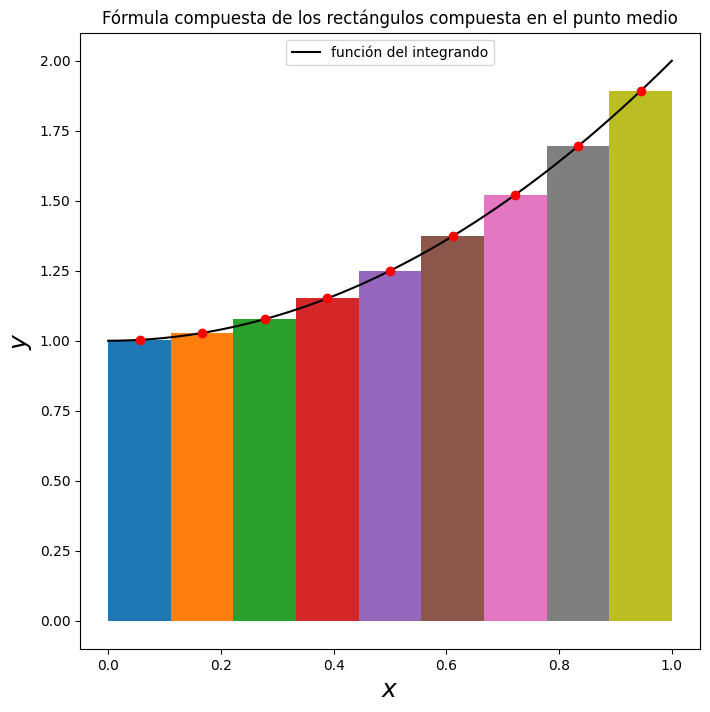

In [1449]:
num_values = 100; num_nodos = 10  # Número de puntos para graficar y número de nodos de integración
x_values = np.linspace(float(a), float(b), num_values)  # Genera valores de x uniformemente distribuidos en [a, b]
y_values = f(x_values)  # Calcula los valores de la función en los puntos x
x_nodos = np.linspace(a, b, num_nodos)  # Genera los nodos de integración uniformemente distribuidos en [a, b]
y_nodos = f(x_nodos)  # Calcula los valores de la función en los nodos

fig, ax = plt.subplots(figsize=(8, 8))  # Crea una figura y un eje para graficar
ax.plot(x_values, y_values, 'k', label='función del integrando')  # Dibuja la función en negro con una etiqueta

# Rellena las áreas bajo la curva usando rectángulos basados en la fórmula del rectángulo a la izquierda
for k in range(1, num_nodos):  # Itera sobre los subintervalos definidos por los nodos
    x_izq = x_nodos[k - 1]
    x_der = x_nodos[k]
    x_medio = (x_izq + x_der) / 2
    altura = f(x_medio)
    
    zz = np.linspace(float(x_izq), float(x_der), num_values)
    yk = [altura] * len(zz)  # Altura constante en el intervalo
    ax.fill_between(zz, 0, yk)
    
    ax.plot(x_medio, altura, 'ro')

ax.legend(loc=9)  # Añade la leyenda en la parte superior central
ax.set_xlabel('$x$', fontsize=18)  # Etiqueta del eje x
ax.set_ylabel('$y$', fontsize=18)  # Etiqueta del eje y
ax.set_title('Fórmula compuesta de los rectángulos compuesta en el punto medio')  # Título del gráfico

## Ejercicio 7: 
> Implemente una función que calcule la integral de una función $f$ en el intervalo $[a,b]$ usando la fórmula de Simpson compuesta, parametrizando también el número de subintervalos utilizados (se premia la eficiencia). Represente gráficamente la fórmula de Simpson compuesta análogamente a la representación mostrada para la fórmula de los trapecios compuesta.

Debido a que no se comenta nada sobre la función y los intervalos a usar tomaremos los mismos valores que en el ejercicio anterio así como la función a usar. Para poder comparar correctamente tomamos los valores:
- $f(x)=x²+1$
- $[0,1]$ como intervalo de integración.
- $n=10$

In [1450]:
f=func

integral=intn.Simpson_compuesta(f,0,1,10)
print("Valor aproximado de la integral: ", integral)

Valor aproximado de la integral:  1.3333333333333333


Por tanto, vemos que la aproximación es bastante buena, tan buena que da el valor exacto. Procedemos a graficar la situación.

Text(0.5, 1.0, 'Fórmula del Simpson compuesta')

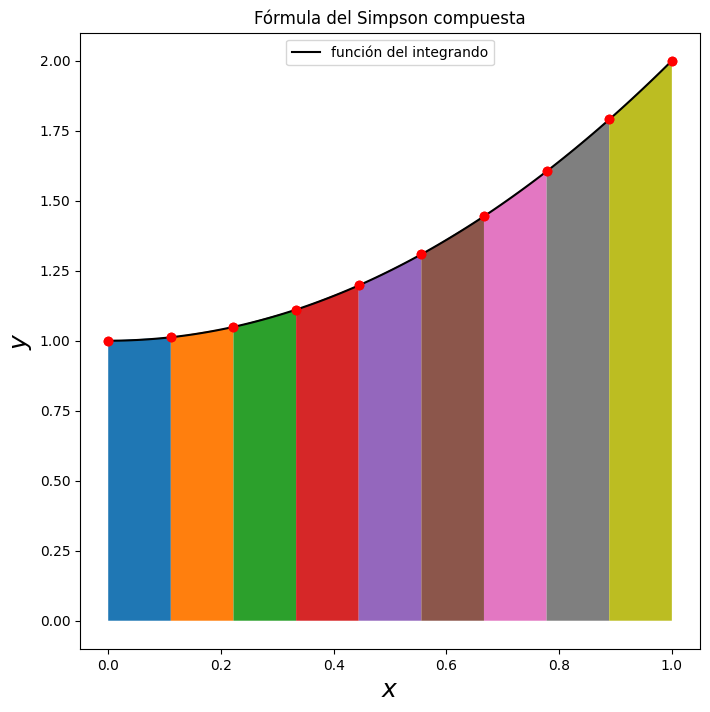

In [1451]:
num_values = 100                            # Número de puntos para graficar
num_nodos=10                                # Número de nodos de integración    
x_values = np.linspace(float(a),float(b),num_values)        
y_values = f(x_values)
x_nodos = np.linspace(a,b,num_nodos)
y_nodos = f(x_nodos)

fig,ax = plt.subplots(figsize=(8,8))        # Crea una figura y un eje para graficar
ax.plot(x_values,y_values,'k',label='función del integrando')
for k in range(1,num_nodos):                   # Itera sobre los subintervalos definidos por los nodos generando las parábolas y los rectángulos
    zz = np.linspace(float(x_nodos[k-1]),float(x_nodos[k]),num_values)
    if(k==num_nodos-1):
        yk = [intn.linea(z,x_nodos[k-1],y_nodos[k-1],x_nodos[k],y_nodos[k]) for z in zz]
    else:
        yk = [intn.parabola(x, x_nodos[k-1], y_nodos[k-1], x_nodos[k], y_nodos[k], x_nodos[k+1], y_nodos[k+1]) for x in zz]   
     
    ax.fill_between(zz,0,yk)
ax.plot(x_nodos,y_nodos,'ro')



ax.legend(loc=9)                            # Añade la leyenda en la parte superior central
ax.plot(x_nodos,y_nodos,'ro')               # Dibuja los nodos de integración en rojo
ax.set_xlabel('$x$',fontsize=18)            # Etiqueta del eje x
ax.set_ylabel('$y$',fontsize=18)            # Etiqueta del eje y
ax.set_title('Fórmula del Simpson compuesta')   # Título del gráfico

Y como se puede ver, obtenemos una solución muy bien aproximada de la solución, por lo menos para el ojo humano.

## Ejercicio 8:
> Realice una comparativa entre los errores cometidos al aproximar funciones potencias sucesivas $x^i$, con $i=1,2,3,\ldots$ en el intervalo $[0,1]$ mediante las fórmulas de los trapecios y de Simpson compuestas con diferentes valores de $h$; e inducir de ahí, los posibles órdenes de exactitud (a partir de los valores de $i$ que proporcionen valores exactos de la integral). No deje de tener en cuenta los posibles errores de redondeo, inevitables en todo cálculo realizado con ordenador.

In [1452]:
# Vamos a tomar un array de valores exactos de integrales de potencias
n = 10
exactos= [sp.integrate(x**i,(x,0,1)) for i in range(n)] # Valores exactos de la integral definida de x^i en [0,1]

# Vamos a calcular los valores aproximados de la integral definida de x^i en [0,1] usando la regla del trapecio compuesta
aproximados_trapecio = [intn.Trapecios_compuesta(lambda x: x**i,0,1,10) for i in range(n)]

# Vamos a calcular los valores aproximados de la integral definida de x^i en [0,1] usando la regla de Simpson compuesta
aproximados_simpson = [intn.Simpson_compuesta(lambda x: x**i,0,1,10) for i in range(n)]

# Vamos a calcular los errores entre los valores exactos y los aproximados
errores_trapecio = [exactos[i] - aproximados_trapecio[i] for i in range(n)]
errores_simpson = [exactos[i] - aproximados_simpson[i] for i in range(n)]

print("Valores exactos:", exactos)
print("Valores aproximados del trapecio compuesta:", aproximados_trapecio)
print("Valores aproximados de Simpson compuesta:", aproximados_simpson)

print("Errores de la fórmula del trapecio compuesta:", errores_trapecio)
print("Errores de la fórmula de Simpson compuesta:", errores_simpson)

Valores exactos: [1, 1/2, 1/3, 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10]
Valores aproximados del trapecio compuesta: [np.float64(1.0), np.float64(0.5), np.float64(0.3350000000000001), np.float64(0.25250000000000006), np.float64(0.20333), np.float64(0.17082500000000003), np.float64(0.1478405), np.float64(0.13080425000000004), np.float64(0.11773133300000001), np.float64(0.10743049850000003)]
Valores aproximados de Simpson compuesta: [np.float64(1.0), np.float64(0.5), np.float64(0.3333333333333333), np.float64(0.25000000000000006), np.float64(0.20001333333333335), np.float64(0.16670000000000004), np.float64(0.14292333333333337), np.float64(0.12511500000000003), np.float64(0.11129336133333335), np.float64(0.10027012600000003)]
Errores de la fórmula del trapecio compuesta: [0, 0, -0.00166666666666676, -0.00250000000000006, -0.00333000000000000, -0.00415833333333337, -0.00498335714285716, -0.00580425000000004, -0.00662022188888890, -0.00743049850000002]
Errores de la fórmula de Simpson compuesta: 

Donde se ve claramente que se cumplen los grados de exactitud que conocíamos inicialmente de forma aproximada:
- **Simpson**: exacta en $\mathbb{P_3}$ pues el valor de $x³$ es prácticamente nulo y cuyo desvío puede ocasionarse por truncamientos del ordenador.
- **Trapecio**: exacta en $\mathbb{P_1}$ pues el valor de $x$ es prácticamente nulo y cuyo desvío puede ocasionarse por truncamientos del ordenador.

## Ejercicio 9:
> Programar las técnicas de integración de Romberg y adaptativa, para después aplicarlas a la aproximación de la siguiente integral $$\int_a^b p(x)\, dx$$
>siendo  $\;a=\displaystyle\min_{0\leq i\leq 7}{d_i}$, $\;b=\displaystyle\max_{0\leq i\leq 7}{d_i}$ y
>$$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
>(siendo $d_0, d_1, \ldots, d_7$ los dígitos de su DNI, pasaporte o tarjeta de residente).

Debido a que no nos dicen una condición de parada, en ambos métodos usaremos una condición de parada basada en tolerancia, usaremos como tolerancia $tol=10^{-5}$. En integración adaptativa quedaría como:
$$|S(a,b)-S(a,m)-S(m,b)|<10\epsilon, \epsilon=10^{-5}$$

In [1453]:
def f(x):
    return 2+6*x+5*x**2+x**3+2*x**4+9*x**5+9*x**6    

exacto = sp.integrate(f(x),(x,0,9)).evalf()
romberg = intn.Integracion_Romberg(f,0,9) 

print("Valor aproximado de la integral: ", romberg)
print("Valor exacto: ", exacto)


Valor aproximado de la integral:  6973428.9214285705
Valor exacto:  6973428.92142857


Pasamos a realizar la ejecución con integración adaptativa, tal y como se vió en la teoría, vamos a realizar la integración adaptativa usando la formula de Simpson simple.

In [1454]:
adaptativa= intn.Integracion_adaptativa(f,0,9,10**(-5))
print("Valor aproximado de la integral: ", adaptativa)
print("Valor exacto: ", exacto)

Valor aproximado de la integral:  6973428.92143104
Valor exacto:  6973428.92142857


Para compararlo, calculamos los errores con el valor exacto para ver que el error de **integración de Romberg** es menor que el cometido en **integración adaptativa** en varios órdenes de magnitud.

In [1455]:
err_romberg = abs(exacto - romberg)
err_adap = abs(exacto-adaptativa)

print("Error cometido en integración de romberg: ", err_romberg)
print("Error cometido en integración adaptativa: ", err_adap)

Error cometido en integración de romberg:  9.31322574615479e-10
Error cometido en integración adaptativa:  2.46893614530563e-6


En clase se comentó que se premiaba la eficiencia de la **integración de Romberg**; usaremos la fórmula de las transparencias sobre la primera columna de la tabla. No obstante, haciendo pruebas vamos a ver que la aproximación bajo las mismas condiciones es peor.

In [1456]:
romberg_eficiente = intn.Integracion_Romberg_eficiente(f,0,9)
print("Valor aproximado de la integral con Romberg eficiente: ", romberg_eficiente)
err_romberg_eficiente = abs(exacto - romberg_eficiente)
print("Error cometido en integración de romberg eficiente: ", err_romberg_eficiente)
print("Error cometido en integración de romberg: ", err_romberg)

Valor aproximado de la integral con Romberg eficiente:  6973442.368696902
Error cometido en integración de romberg eficiente:  13.4472683304921
Error cometido en integración de romberg:  9.31322574615479e-10


## Ejercicio 10:
> Calcule la misma integral del ejercicio 9 pero utilizando la orden `quad` y compare los resultados de la integración Romberg y adaptativa manuales con los de la orden `quad`.

Haciendo uso de la herramienta `quad`obtenemos el siguiente resultado:

In [1457]:
quad_value = quad(f,0,9)

print("Valor romberg: ", romberg)
print("Valor adaptativa: ", adaptativa)
print("Valor quad: ", quad_value[0])

Valor romberg:  6973428.9214285705
Valor adaptativa:  6973428.92143104
Valor quad:  6973428.921428572


Vemos ahora los errores para determinar cual resultado es mejor.

In [1458]:
print("Error cometido en integración de romberg: ", err_romberg)
print("Error cometido en integración adaptativa: ", err_adap)
print("Error cometido en orden quad: ", quad_value[-1])

Error cometido en integración de romberg:  9.31322574615479e-10
Error cometido en integración adaptativa:  2.46893614530563e-6
Error cometido en orden quad:  7.742061349156972e-08


Y como se puede ver, **integración de Romberg** sigue aportando un valor más preciso.

In [1459]:
print("Fin de la práctica 🏁")

Fin de la práctica 🏁
